In [1]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

!mv kaggle.json ~/.kaggle/
!mkdir -p ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

print("Import ok!")
import pandas as pd

Import ok!


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')


In [9]:
y = data['label']
x = data.drop(columns = ['label'])
len(x )

10015

In [10]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Machine-learning/HAM10000_metadata.csv')


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
classes

#voersampling

In [11]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


#Standardization

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_standardized = (x - np.mean(x)) / np.std(x)
# Reshape the standardized 'x' if it has more than two dimensions
num_samples = x_standardized.shape[0]
x_flattened = x_standardized.reshape(num_samples, -1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_flattened, y, test_size=0.2, random_state=1)

#Model Trainig


In [14]:
# Initialize the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test)


#Model Evoluation

In [15]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.36060509214871633
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.28      0.34      1359
           1       0.30      0.49      0.37      1318
           2       0.27      0.42      0.33      1262
           3       0.34      0.21      0.26      1351
           4       0.53      0.44      0.48      1374
           5       0.31      0.36      0.34      1358
           6       0.53      0.33      0.40      1365

    accuracy                           0.36      9387
   macro avg       0.39      0.36      0.36      9387
weighted avg       0.39      0.36      0.36      9387



In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have trained the Gaussian Naive Bayes classifier and predicted on the test data
# clf.fit(X_train, Y_train)
# y_pred = clf.predict(X_test)

# Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)

# Calculate class-wise accuracy
num_classes = len(np.unique(Y_test))  # Assuming you have a variable num_classes with the number of classes
class_accuracy = {}
for class_label in range(num_classes):
    class_total = confusion_mat[class_label, :].sum()
    class_correct = confusion_mat[class_label, class_label]
    class_accuracy[class_label] = class_correct / class_total

# Print class-wise accuracy
for class_label, acc in class_accuracy.items():
    print(f"Class {class_label}: Accuracy = {acc:.4f}")


Class 0: Accuracy = 0.2848
Class 1: Accuracy = 0.4856
Class 2: Accuracy = 0.4200
Class 3: Accuracy = 0.2110
Class 4: Accuracy = 0.4418
Class 5: Accuracy = 0.3623
Class 6: Accuracy = 0.3253


#Standardization and Splitting Data

In [17]:
import matplotlib.pyplot as plt

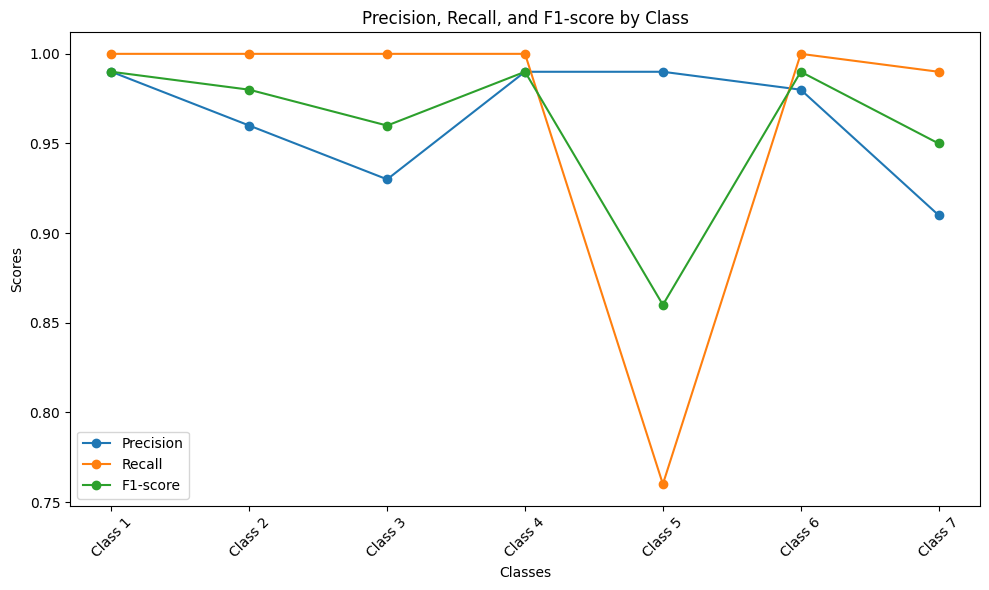

In [18]:
# Precision, Recall, and F1-score values for each class
precision_values = [0.99, 0.96, 0.93, 0.99, 0.99, 0.98, 0.91]
recall_values = [1.00, 1.00, 1.00, 1.00, 0.76, 1.00, 0.99]
f1_score_values = [0.99, 0.98, 0.96, 0.99, 0.86, 0.99, 0.95]
# Labels for each class
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

# Line chart data
x = range(len(class_labels))

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot precision, recall, and F1-score as lines
plt.plot(x, precision_values, marker='o', label='Precision')
plt.plot(x, recall_values, marker='o', label='Recall')
plt.plot(x, f1_score_values, marker='o', label='F1-score')

# Set x-axis ticks and labels
plt.xticks(x, class_labels, rotation=45)

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score by Class')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


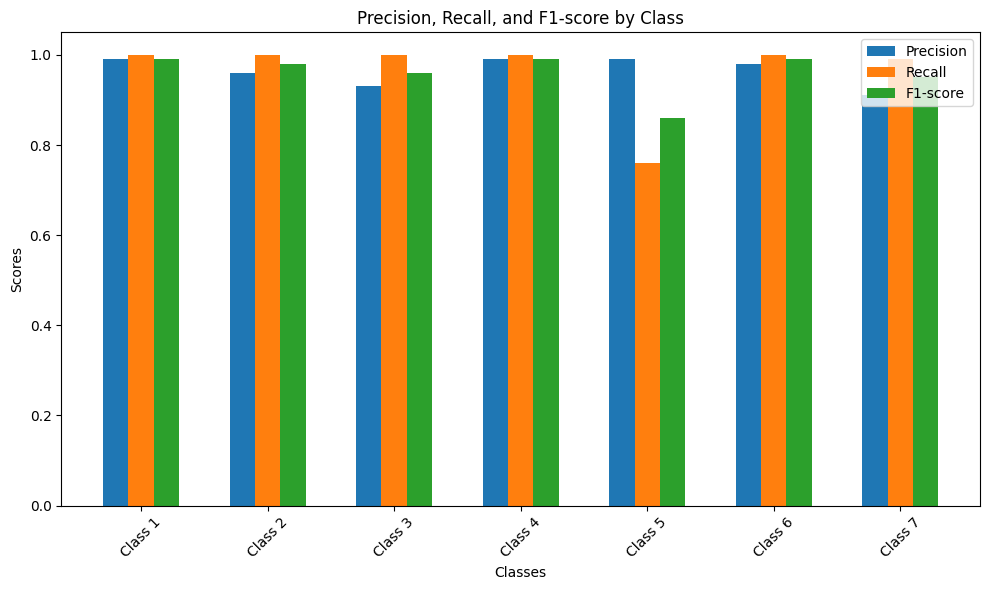

In [19]:
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for each class
precision_values = [0.99, 0.96, 0.93, 0.99, 0.99, 0.98, 0.91]
recall_values = [1.00, 1.00, 1.00, 1.00, 0.76, 1.00, 0.99]
f1_score_values = [0.99, 0.98, 0.96, 0.99, 0.86, 0.99, 0.95]
# Labels for each class
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

# Line chart data
x = range(len(class_labels))

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot precision, recall, and F1-score as bars
bar_width = 0.2
plt.bar(x, precision_values, width=bar_width, align='center', label='Precision')
plt.bar([pos + bar_width for pos in x], recall_values, width=bar_width, align='center', label='Recall')
plt.bar([pos + 2 * bar_width for pos in x], f1_score_values, width=bar_width, align='center', label='F1-score')

# Set x-axis ticks and labels
plt.xticks([pos + bar_width for pos in x], class_labels, rotation=45)

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score by Class')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
